# Recognizing  Handwritten Digits

- Predicting a numeric value, and then reading and interpreting an image that uses a handwritten font.
- Use SVM estimator for data analysis

#### Some Scientist claims that it predicts the digit accurately 95% of the times. Perform data Analysis to accept or reject this Hypothesis.

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load dataset from sklearn library

from sklearn import datasets,svm
digits = datasets.load_digits()

In [3]:
# info about data
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

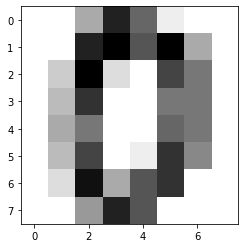

In [5]:
#show 1st image using matplotlib 
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target.size

1797

In [8]:
#model building
svclassifier = svm.SVC(kernel='linear')

In [9]:
#fit the data
svclassifier.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
#predict data by given model
svclassifier.predict(digits.data[1791:1796])

array([4, 9, 0, 8, 9])

In [11]:
digits.target[1791:1796]

array([4, 9, 0, 8, 9])

Here, Both Predicted and given data are same values. So, we can say that our model is working properly.

In [12]:
length = len(digits.images)
data = digits.images.reshape((length, -1))

In [13]:
# split data in training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [14]:
#fit the data 
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
#predict output
predicted = svclassifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

In [17]:
# Some measures of model Accuracy

print("Accuracy : ",accuracy_score(y_test, predicted))
print("Precision : ",precision_score(y_test, predicted, average='weighted'))
print("Recall : ",recall_score(y_test, predicted, average='weighted'))
print("Confusion Matrix : ",confusion_matrix(y_test, predicted))
print("Classification Report : ",classification_report(y_test, predicted))

Accuracy :  0.9722222222222222
Precision :  0.9738072000572002
Recall :  0.9722222222222222
Confusion Matrix :  [[30  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  1]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  2]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  1  0  1  1  0  0  0 29  1]
 [ 0  0  0  0  0  0  0  0  0 31]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        41
           3       0.97      0.97      0.97        36
           4       0.94      0.97      0.96        34
           5       0.97      0.95      0.96        38
           6       1.00      0.97      0.99        39
           7       1.00      1.00      1.00        31
           8       1.00      0.88      0.94  

In [18]:
# Accuracy score

svclassifier.score(X_test, y_test)

0.9722222222222222

#### Let us Now take one image of handwritten digit.

Read image with opencv python library and perform analysis

In [19]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [20]:
import cv2

In [21]:
# read image
image = cv2.imread('1.png')

print (type(image))

<class 'numpy.ndarray'>


In [22]:
image.shape

(370, 353, 3)

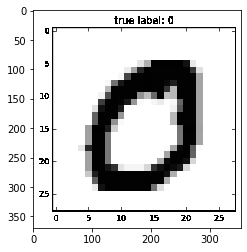

In [23]:
# show image
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [24]:
# conver image in grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
gray = cv2.bitwise_not(gray)

In [26]:
# resize in 8*8 
resizedimg = cv2.resize(gray, (8,8), interpolation = cv2.INTER_AREA)

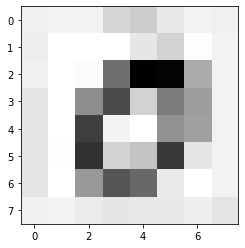

In [27]:
# Resized Image
plt.imshow(resizedimg, cmap=plt.cm.gray_r, interpolation='nearest')

In [28]:
resizedimg = resizedimg.reshape(64,)

In [29]:
# predict value of image
predict = svclassifier.predict([resizedimg])

In [30]:
predict

array([0])

Here, Our Model Predict 0 value of image which is correct.